#  <u> 1st step : Load

We import the different librairies that we are going to use :

    - pandas : Pandas is a library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical arrays and time series.
    
    - Matplotlib is a Python programming language library for plotting and visualizing data as graphs.

In [3]:
# we import the useful librairies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We open the final merged table of the 'normalization part ' with the columns upper value and lower value

In [25]:
# we open and read the merge table of all indicators
bronze_dataset = pd.read_csv ('./data/bronze_dataset_with_outliers.csv')
bronze_dataset = bronze_dataset.drop(bronze_dataset.columns[0], axis = 1)
bronze_dataset

,Code,Year,Indicator,Real value,Lower value,Upper value
0,AFG,1966,Deaths,1.616590e+05,3.980225e+04,2.280962e+05
1,AFG,1967,Deaths,1.625790e+05,3.980225e+04,2.280962e+05
2,AFG,1968,Deaths,1.635730e+05,3.980225e+04,2.280962e+05
3,AFG,1969,Deaths,1.646380e+05,3.980225e+04,2.280962e+05
4,AFG,1970,Deaths,1.654300e+05,3.980225e+04,2.280962e+05
...,...,...,...,...,...,...
66489,OWID_GFR,1986,GDP,7.110545e+11,-5.467304e+11,9.798115e+11
66490,OWID_GFR,1987,GDP,7.913833e+11,-5.467304e+11,9.798115e+11
66491,OWID_GFR,1988,GDP,7.847509e+11,-5.467304e+11,9.798115e+11
66492,OWID_GFR,1989,GDP,8.517760e+11,-5.467304e+11,9.798115e+11



# <u> 2nd STEP : Remove outliers IQR method

We need to find outliers and remove them 
To do that, we take our renamed final table, and with loc , we keep only specific datas
    
Indeed the ' ~ ' means 'not' and the folowing condition is'values out of range' it means when 'the real value is not between the lower value and the upper value '
    
So at the end we will just have the values not out of range, so we will remove outliers with this command  

In [26]:
without_outliers=bronze_dataset.loc[~((bronze_dataset['Real value']<bronze_dataset['Lower value']) | (bronze_dataset['Real value']>bronze_dataset['Upper value']))]
without_outliers

,Code,Year,Indicator,Real value,Lower value,Upper value
0,AFG,1966,Deaths,1.616590e+05,3.980225e+04,2.280962e+05
1,AFG,1967,Deaths,1.625790e+05,3.980225e+04,2.280962e+05
2,AFG,1968,Deaths,1.635730e+05,3.980225e+04,2.280962e+05
3,AFG,1969,Deaths,1.646380e+05,3.980225e+04,2.280962e+05
4,AFG,1970,Deaths,1.654300e+05,3.980225e+04,2.280962e+05
...,...,...,...,...,...,...
66488,OWID_GFR,1985,GDP,5.686651e+11,-5.467304e+11,9.798115e+11
66489,OWID_GFR,1986,GDP,7.110545e+11,-5.467304e+11,9.798115e+11
66490,OWID_GFR,1987,GDP,7.913833e+11,-5.467304e+11,9.798115e+11
66491,OWID_GFR,1988,GDP,7.847509e+11,-5.467304e+11,9.798115e+11


Then we delete the upper and lower values colums to reduce our final table 

In [27]:
table_clean =without_outliers.drop(['Lower value','Upper value'],axis=1)
table_clean

,Code,Year,Indicator,Real value
0,AFG,1966,Deaths,1.616590e+05
1,AFG,1967,Deaths,1.625790e+05
2,AFG,1968,Deaths,1.635730e+05
3,AFG,1969,Deaths,1.646380e+05
4,AFG,1970,Deaths,1.654300e+05
...,...,...,...,...
66488,OWID_GFR,1985,GDP,5.686651e+11
66489,OWID_GFR,1986,GDP,7.110545e+11
66490,OWID_GFR,1987,GDP,7.913833e+11
66491,OWID_GFR,1988,GDP,7.847509e+11


# <u> 3rd  STEP : Silver 

Now, we are going to put each indicators in a column and to index the dataset 

In [28]:
silver_dataset1=table_clean.set_index(["Code", "Year"]).pivot(columns="Indicator", values="Real value").reset_index()
silver_dataset=silver_dataset1.rename(columns={0: 'index'})
silver_dataset

Indicator,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
0,ABW,1950,NaN,NaN,NaN,NaN,57.2,NaN
1,ABW,1951,NaN,NaN,NaN,NaN,57.7,NaN
2,ABW,1952,NaN,NaN,NaN,NaN,58.7,NaN
3,ABW,1953,NaN,NaN,NaN,NaN,59.5,NaN
4,ABW,1954,NaN,NaN,NaN,NaN,60.4,NaN
...,...,...,...,...,...,...,...,...
21097,ZWE,2017,26069.0,3.7064,NaN,0.532,60.7,NaN
21098,ZWE,2018,24648.0,3.6591,NaN,0.535,61.4,NaN
21099,ZWE,2019,24006.0,3.5994,NaN,0.533,61.3,NaN
21100,ZWE,2020,23533.0,3.5451,NaN,0.533,61.1,NaN


Then we convert this new table without outliers into a csv document

In [29]:
silver_dataset.to_csv('./data/SilverDataset.csv')

# <u> 4th  STEP : Visual explanations  

The goal in this part is to understand how the process of removing outliers works.  
First, we display the dataframe with outliers values to see which country had ouliers values for an indicator.

In [30]:
with_outlier=bronze_dataset.loc[((bronze_dataset['Real value']<bronze_dataset['Lower value']) | (bronze_dataset['Real value']>bronze_dataset['Upper value']))]
with_outlier.head(10)

,Code,Year,Indicator,Real value,Lower value,Upper value
159,AFG,2009,GDP,8.015607e+09,-2.693621e+09,6.044926e+09
160,AFG,2010,GDP,1.031396e+10,-2.693621e+09,6.044926e+09
161,AFG,2011,GDP,1.119100e+10,-2.693621e+09,6.044926e+09
162,AFG,2012,GDP,1.300060e+10,-2.693621e+09,6.044926e+09
163,AFG,2013,GDP,1.282286e+10,-2.693621e+09,6.044926e+09
164,AFG,2014,GDP,1.218510e+10,-2.693621e+09,6.044926e+09
216,AFG,2007,Fertility,6.530300e+00,6.647813e+00,8.072512e+00
217,AFG,2008,Fertility,6.376200e+00,6.647813e+00,8.072512e+00
218,AFG,2009,Fertility,6.235400e+00,6.647813e+00,8.072512e+00
219,AFG,2010,Fertility,6.098700e+00,6.647813e+00,8.072512e+00


We can see that for instance , Afghanistan had outliers values for the fertility indicator.
That's why we are going to use this country and this indicator to see what happened during the removing outliers process.

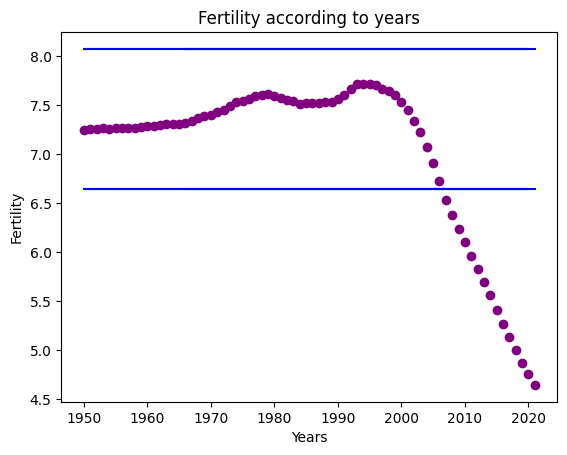

In [31]:
# We first reduce the dataset before removing outliers to keep only one country et one indicator
bronze_dataset = bronze_dataset[bronze_dataset.Code == 'AFG']
bronze_dataset = bronze_dataset[bronze_dataset.Indicator == 'Fertility']

# we plot the two limits 
plt.plot(bronze_dataset['Year'], bronze_dataset['Lower value'], color='blue')
plt.plot(bronze_dataset['Year'], bronze_dataset['Upper value'], color='blue')

#we plot the values of fertility for each year for Afghanistan with outliers
plt.scatter(bronze_dataset['Year'], bronze_dataset['Real value'], color='purple')

# we define the title and the labels of the axis 
plt.title('Fertility according to years')
plt.xlabel('Years')
plt.ylabel('Fertility')

plt.show()

So we can see that few values are outside the two limits, that's why we have removed them during the process of cleaning and removing outliers

Now we can plot the same graph but with the values from the dataset without ouliers to see that we have well removed the values outside the limits 

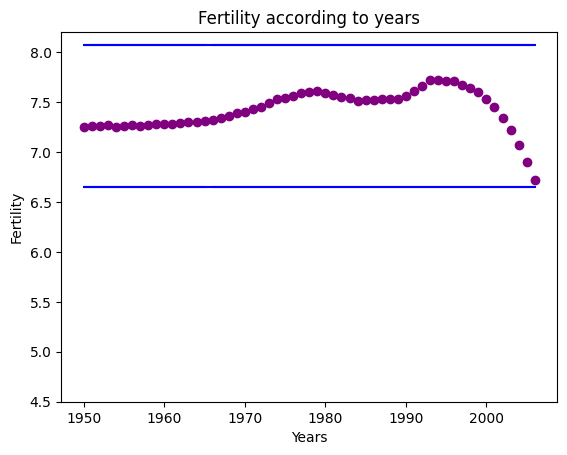

In [32]:
# We first reduce the dataset without outliers to keep only one country et one indicator
without_outliers = without_outliers[without_outliers.Code == 'AFG']
without_outliers = without_outliers[without_outliers.Indicator == 'Fertility']

# we plot the two limits 
plt.plot(without_outliers['Year'], without_outliers['Lower value'], color='blue')
plt.plot(without_outliers['Year'], without_outliers['Upper value'], color='blue')

#we plot the values of fertility for each year for Afghanistan without outliers
plt.scatter(without_outliers['Year'], without_outliers['Real value'], color='purple')

# we define the title and the labels of the axis 
plt.title('Fertility according to years')
plt.xlabel('Years')
plt.ylabel('Fertility')

plt.gca().set_ylim(4.5, 8.2)

plt.show()

On this graph, we can see that now there is only datas between the lower limit and the upper limits.
We have removed all the outliers !

# <u> 5th step : Remove outliers Z-score Method


Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean

#### Z score = (x - mean) / std. deviation

It is estimated for a normal distribution that : 
68% of the data points lie between +/- 1 standard deviation.  
95% of the data points lie between +/- 2 standard deviation  
99.7% of the data points lie between +/- 3 standard deviation  

Removing outliers with z-score : 
If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be considered as an outlier.

#  <u> Load

In [15]:
# we open and read the merge table of all indicators 
bronze_dataset = pd.read_csv ('./data/all_indicators_table.csv')
bronze_dataset = bronze_dataset.drop(bronze_dataset.columns[0], axis = 1)
bronze_dataset = bronze_dataset.drop(bronze_dataset.columns[0], axis = 1)
bronze_dataset

,Code,Year,Deaths,LifeExpectancy,GenderInequality,GDP,Fertility,tertiary_education
0,AFG,1966,161659.0,35.5,NaN,500000224.0,7.3203,NaN
1,AFG,1967,162579.0,35.9,NaN,605919040.0,7.3387,NaN
2,AFG,1968,163573.0,36.4,NaN,572222720.0,7.3628,NaN
3,AFG,1969,164638.0,36.9,NaN,587037568.0,7.3887,NaN
4,AFG,1970,165430.0,37.4,NaN,728703360.0,7.3996,1.08
...,...,...,...,...,...,...,...,...
21407,ZWE,1945,NaN,NaN,NaN,41000000.0,NaN,NaN
21408,ZWE,1946,NaN,NaN,NaN,48000000.0,NaN,NaN
21409,ZWE,1947,NaN,NaN,NaN,59000000.0,NaN,NaN
21410,ZWE,1948,NaN,NaN,NaN,72000000.0,NaN,NaN


In [16]:
# we put all the indicators in one column 
bronze_dataset=(bronze_dataset.set_index(["Code", "Year"]).stack().reset_index(name='Value').rename(columns={'level_2':'Indicator'})) 

#we drop the country with a NaN value for Name and we reset the index
bronze_dataset = bronze_dataset.dropna(subset=['Code'])
bronze_dataset = bronze_dataset.sort_values(by=['Code', 'Indicator']).reset_index(drop=True)
bronze_dataset


,Code,Year,Indicator,Value
0,ABW,1950,Fertility,5.8010
1,ABW,1951,Fertility,5.7669
2,ABW,1952,Fertility,5.6950
3,ABW,1953,Fertility,5.6159
4,ABW,1954,Fertility,5.5295
...,...,...,...,...
66489,ZWE,1990,tertiary_education,1.8300
66490,ZWE,1995,tertiary_education,1.3200
66491,ZWE,2000,tertiary_education,0.5300
66492,ZWE,2005,tertiary_education,0.4400


We group the dataset by name of country and indicator 

In [17]:
bronze_dataset_group = bronze_dataset.groupby(['Code','Indicator'])

# Z-score

we compute the z score for each column of indicator

In [18]:
# we import the scipy module that includes modules for statistics 
from scipy import stats
all_columns = ['Deaths', 'LifeExpectancy', 'GenderInequality', 'GDP ', 'Fertility', 'tertiary_education']

# we compute the z score for each column of indicator
df_zscore = bronze_dataset_group.apply(stats.zscore,nan_policy='omit')
df_zscore = df_zscore.reset_index()
df_zscore = df_zscore.drop(df_zscore.columns[2], axis = 1)

#we add the year column
df_zscore['Year'] = bronze_dataset['Year'] 
df_zscore


,Code,Indicator,Year,Value
0,ABW,Fertility,1950,2.322425
1,ABW,Fertility,1951,2.295669
2,ABW,Fertility,1952,2.239252
3,ABW,Fertility,1953,2.177186
4,ABW,Fertility,1954,2.109392
...,...,...,...,...
66489,ZWE,tertiary_education,1990,1.161307
66490,ZWE,tertiary_education,1995,0.269936
66491,ZWE,tertiary_education,2000,-1.110816
66492,ZWE,tertiary_education,2005,-1.268117


Then we add to the bronze dataset the value of z-score

In [19]:
bronze_dataset['Z-score'] = df_zscore['Value'] 
bronze_dataset

,Code,Year,Indicator,Value,Z-score
0,ABW,1950,Fertility,5.8010,2.322425
1,ABW,1951,Fertility,5.7669,2.295669
2,ABW,1952,Fertility,5.6950,2.239252
3,ABW,1953,Fertility,5.6159,2.177186
4,ABW,1954,Fertility,5.5295,2.109392
...,...,...,...,...,...
66489,ZWE,1990,tertiary_education,1.8300,1.161307
66490,ZWE,1995,tertiary_education,1.3200,0.269936
66491,ZWE,2000,tertiary_education,0.5300,-1.110816
66492,ZWE,2005,tertiary_education,0.4400,-1.268117


# Remove outliers

Now, we remove the outliers, indeed

In [20]:
# we delete the values > 3 (our treshold) and we keep the NaN values since we could fill it in an other part 
df_no_outliers = bronze_dataset[bronze_dataset['Z-score'] <= 3]
df_no_outliers

,Code,Year,Indicator,Value,Z-score
0,ABW,1950,Fertility,5.8010,2.322425
1,ABW,1951,Fertility,5.7669,2.295669
2,ABW,1952,Fertility,5.6950,2.239252
3,ABW,1953,Fertility,5.6159,2.177186
4,ABW,1954,Fertility,5.5295,2.109392
...,...,...,...,...,...
66489,ZWE,1990,tertiary_education,1.8300,1.161307
66490,ZWE,1995,tertiary_education,1.3200,0.269936
66491,ZWE,2000,tertiary_education,0.5300,-1.110816
66492,ZWE,2005,tertiary_education,0.4400,-1.268117


In [22]:
silver_dataset_score = df_no_outliers.drop(df_no_outliers.columns[4], axis = 1)
silver_dataset_score=silver_dataset_score.set_index(["Code", "Year"]).pivot(columns="Indicator", values="Value").reset_index()
silver_dataset_score=silver_dataset_score.rename(columns={0: 'index'})
silver_dataset_score

Indicator,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
0,ABW,1950,NaN,5.8010,NaN,NaN,57.2,NaN
1,ABW,1951,NaN,5.7669,NaN,NaN,57.7,NaN
2,ABW,1952,NaN,5.6950,NaN,NaN,58.7,NaN
3,ABW,1953,NaN,5.6159,NaN,NaN,59.5,NaN
4,ABW,1954,NaN,5.5295,NaN,NaN,60.4,NaN
...,...,...,...,...,...,...,...,...
21232,ZWE,2017,26069.0,3.7064,NaN,0.532,60.7,NaN
21233,ZWE,2018,24648.0,3.6591,NaN,0.535,61.4,NaN
21234,ZWE,2019,24006.0,3.5994,NaN,0.533,61.3,NaN
21235,ZWE,2020,23533.0,3.5451,NaN,0.533,61.1,NaN


In [23]:
df_no_outliers.to_csv('./data/SilverDatasetZscore.csv')

We can also print all the rows with a z-score >3 to print the outliers 

In [24]:
df_with_outliers = bronze_dataset[bronze_dataset['Z-score'] > 3]
df_with_outliers

,Code,Year,Indicator,Value,Z-score
1770,ARG,2010,GDP,2.987639e+11,3.045872
1771,ARG,2011,GDP,3.482021e+11,3.636750
1772,ARG,2012,GDP,3.826000e+11,4.047867
1773,ARG,2013,GDP,3.991050e+11,4.245133
1774,ARG,2014,GDP,3.330694e+11,3.455886
...,...,...,...,...,...
65659,ZAF,2012,GDP,2.515643e+11,3.384396
65660,ZAF,2013,GDP,2.341530e+11,3.106619
66028,ZMB,2012,GDP,1.614463e+10,3.243165
66029,ZMB,2013,GDP,1.793963e+10,3.677133


# <u>  Visual explanations  

We plot the graph of the z score for GDP for each year for the South AFrica before removing outliers

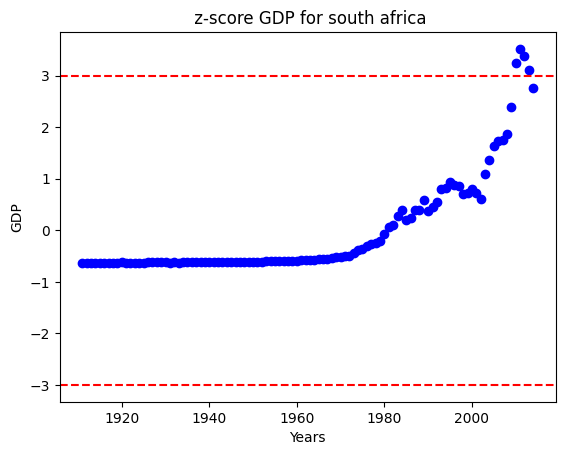

In [25]:
# We reduce the dataset without outliers to keep only one country
df = bronze_dataset[bronze_dataset.Code == 'ZAF']
df = df[df.Indicator == 'GDP ']

#we plot the values of tertiary_education for each year for Brazil with outliers
#plt.scatter(df['Year'], df['Value'], color='purple')

#we plot the zscore of teh dataset with outliers
plt.scatter(df['Year'], df['Z-score'], color='blue')

#we plot the limits for zscore 
plt.axhline(y=3, color='red', linestyle='--', label='y = 3')
plt.axhline(y=-3, color='red', linestyle='--', label='y = 3')

# we define the title and the labels of the axis 
plt.title(' z-score GDP for south africa')
plt.xlabel('Years')
plt.ylabel('GDP')

plt.show()

### We plot the graph of the z score for GDP for each year for the South AFrica after removing outliersrs
we can see that the point at the top has been removed

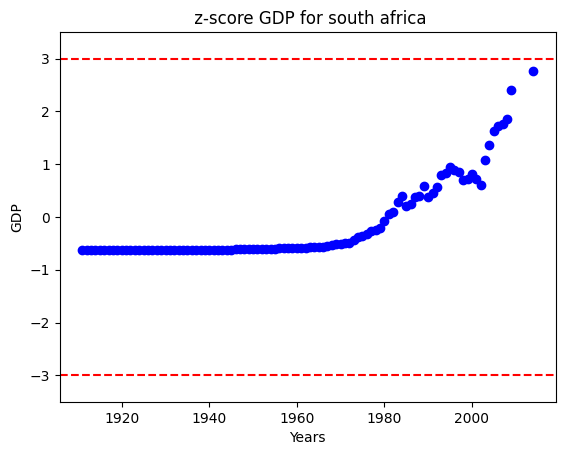

In [26]:
# We first reduce the dataset without outliers to keep only one country et one indicator
without_outliers = df_no_outliers[df_no_outliers.Code == 'ZAF']
without_outliers = without_outliers[without_outliers.Indicator == 'GDP ']

#we plot the values of tertiary_education for each year for Brazil without outliers
plt.scatter(without_outliers['Year'], without_outliers['Z-score'], color='blue')

#we plot the limits for zscore 
plt.axhline(y=3, color='red', linestyle='--', label='y = 3')
plt.axhline(y=-3, color='red', linestyle='--', label='y = 3')


# we define the title and the labels of the axis 
plt.title(' z-score GDP for south africa')
plt.xlabel('Years')
plt.ylabel('GDP')

plt.gca().set_ylim(-3.5, 3.5)

plt.show()

### We plot the graph of the values for GDP for each year for the South AFrica
in blue after removing   
in purple after removing  
we can see that the point at the top has been removed

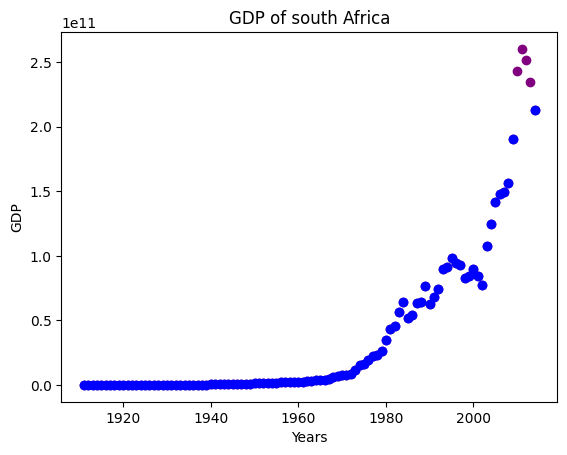

In [27]:
plt.scatter(df['Year'], df['Value'], color='purple')
plt.scatter(without_outliers['Year'], without_outliers['Value'], color='blue')

# we define the title and the labels of the axis 
plt.title('GDP of south Africa')
plt.xlabel('Years')
plt.ylabel('GDP')

plt.show()